In [1]:
## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/autompgdatasetzip/auto-mpg.csv
/kaggle/input/autompgdatasetzip/auto-mpg.names


In [2]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("../input/autompgdatasetzip/auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
#NULL VALUES
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


# Box plot of features

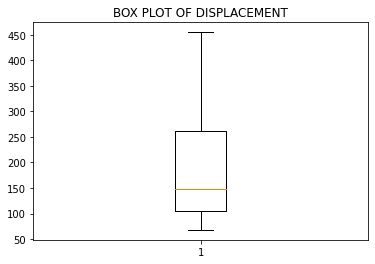

In [6]:
#box plot of features
plt.boxplot(df['displacement'])
plt.title("BOX PLOT OF DISPLACEMENT")
plt.show()

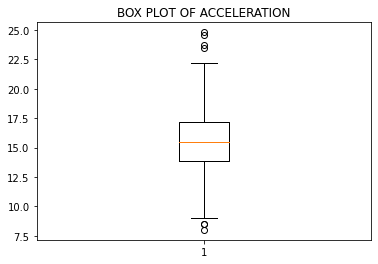

In [7]:
#box plot of acc
plt.boxplot(df['acceleration'])
plt.title("BOX PLOT OF ACCELERATION")
plt.show()

The box plot of  acceleration shows presence of outliers

In [8]:
quart1=df['acceleration'].quantile(0.25)
quart3=df['acceleration'].quantile(0.75)
IQR=quart3-quart1
low_val=quart1 - 1.5*IQR
high_val=quart3 + 1.5*IQR
df.loc[((df['acceleration']< low_val) | (df['acceleration']>high_val))]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl
11,14.0,8,340.0,160,3609,8.0,70,1,plymouth 'cuda 340
59,23.0,4,97.0,54,2254,23.5,72,2,volkswagen type 3
299,27.2,4,141.0,71,3190,24.8,79,2,peugeot 504
326,43.4,4,90.0,48,2335,23.7,80,2,vw dasher (diesel)
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup


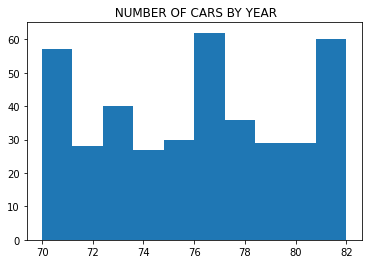

In [9]:
plt.hist(df['model year'])
plt.title(" NUMBER OF CARS BY YEAR")
plt.show()

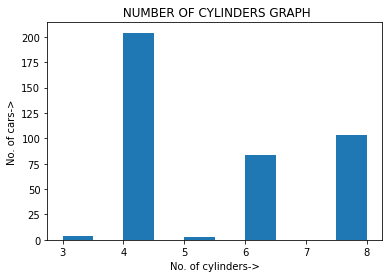

In [10]:
plt.hist(df['cylinders'])
plt.title(" NUMBER OF CYLINDERS GRAPH")
plt.ylabel("No. of cars->")
plt.xlabel("No. of cylinders->")
plt.show()

# Scatter Plot of displacement vs. acceleration

<function matplotlib.pyplot.show(close=None, block=None)>

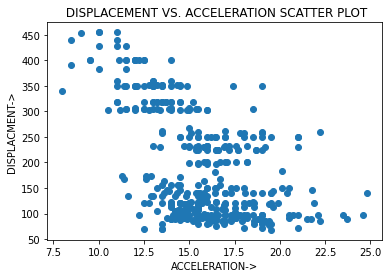

In [11]:
plt.scatter(df['acceleration'], df['displacement']), 
plt.title(" DISPLACEMENT VS. ACCELERATION SCATTER PLOT")
plt.ylabel("DISPLACMENT->")
plt.xlabel("ACCELERATION->")
plt.show